# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+'&q='+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santa terezinha
https://api.openweathermap.org/data/2.5/weather?&appid=29416c5875b075f5e61f0bde0bdec3d5&q=santa terezinha
Processing Record 2 of Set 1 | ushuaia
https://api.openweathermap.org/data/2.5/weather?&appid=29416c5875b075f5e61f0bde0bdec3d5&q=ushuaia
Processing Record 3 of Set 1 | hermanus
https://api.openweathermap.org/data/2.5/weather?&appid=29416c5875b075f5e61f0bde0bdec3d5&q=hermanus
Processing Record 4 of Set 1 | port-aux-francais
https://api.openweathermap.org/data/2.5/weather?&appid=29416c5875b075f5e61f0bde0bdec3d5&q=port-aux-francais
Processing Record 5 of Set 1 | kourou
https://api.openweathermap.org/data/2.5/weather?&appid=29416c5875b075f5e61f0bde0bdec3d5&q=kourou
Processing Record 6 of Set 1 | college
https://api.openweathermap.org/data/2.5/weather?&appid=29416c5875b075f5e61f0bde0bdec3d5&q=college
Processing Record 7 of Set 1 | flying fish cove
https://api.openweathermap.org/dat

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santa terezinha,-29.9002,-50.0904,292.60,93,100,9.65,BR,1701205593
1,ushuaia,-54.8000,-68.3000,279.96,81,75,12.35,AR,1701206187
2,hermanus,-34.4187,19.2345,290.81,69,47,5.78,ZA,1701206173
3,port-aux-francais,-49.3500,70.2167,278.87,98,100,13.59,TF,1701206181
4,kourou,5.1552,-52.6478,302.18,80,21,3.46,GF,1701206188


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santa terezinha,-29.9002,-50.0904,292.60,93,100,9.65,BR,1701205593
1,ushuaia,-54.8000,-68.3000,279.96,81,75,12.35,AR,1701206187
2,hermanus,-34.4187,19.2345,290.81,69,47,5.78,ZA,1701206173
3,port-aux-francais,-49.3500,70.2167,278.87,98,100,13.59,TF,1701206181
4,kourou,5.1552,-52.6478,302.18,80,21,3.46,GF,1701206188


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

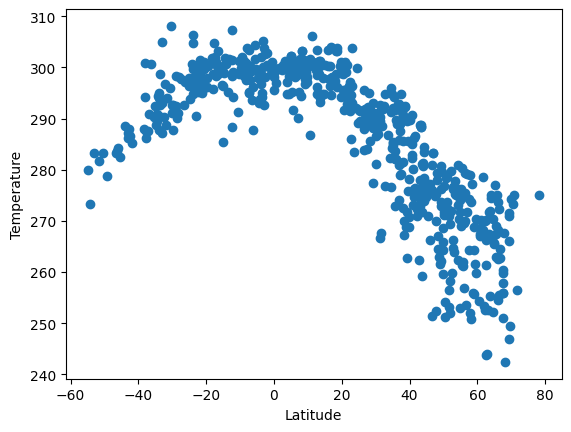

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

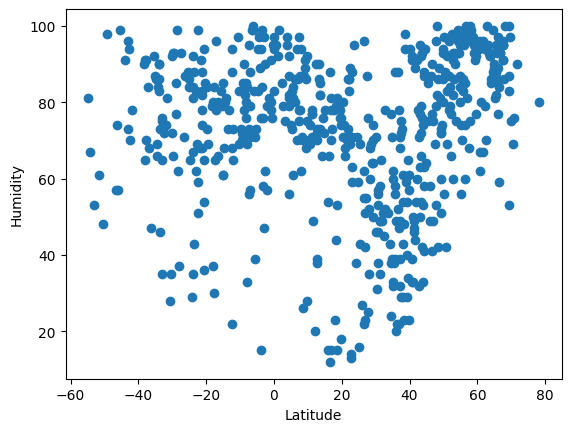

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

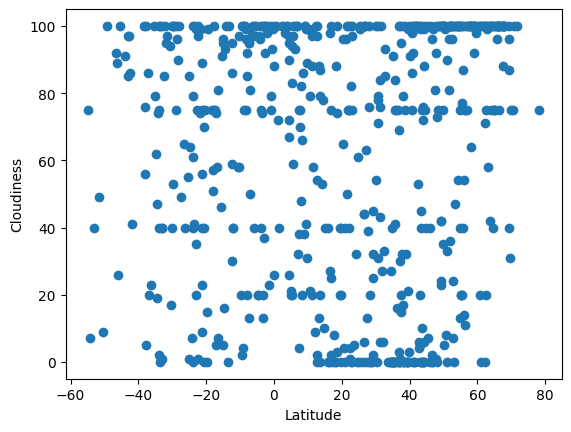

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

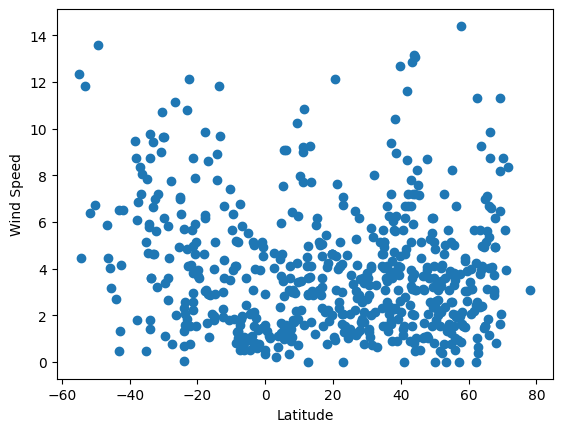

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, p, se) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope, 2))+ 'x' + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,kourou,5.1552,-52.6478,302.18,80,21,3.46,GF,1701206188
5,college,64.8569,-147.8028,265.62,89,75,1.54,US,1701206188
7,talnakh,69.4865,88.3972,249.49,97,31,2.05,RU,1701206179
8,georgetown,5.4112,100.3354,299.11,83,20,1.54,MY,1701205955
11,arkhangel'sk,64.5401,40.5433,267.11,88,100,4.93,RU,1701206191


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santa terezinha,-29.9002,-50.0904,292.60,93,100,9.65,BR,1701205593
1,ushuaia,-54.8000,-68.3000,279.96,81,75,12.35,AR,1701206187
2,hermanus,-34.4187,19.2345,290.81,69,47,5.78,ZA,1701206173
3,port-aux-francais,-49.3500,70.2167,278.87,98,100,13.59,TF,1701206181
6,flying fish cove,-10.4217,105.6791,298.76,69,97,7.43,CX,1701206189


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7437253911136825


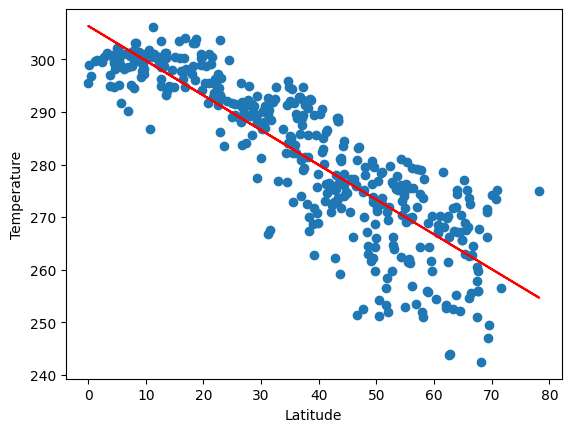

In [15]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Plot regression line
(slope, intercept, rvalue, p, se) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope, 2))+ 'x' + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r square value
print(f"R squared: {rvalue**2}")


# Show plot
plt.show()

R squared: 0.47092123767565075


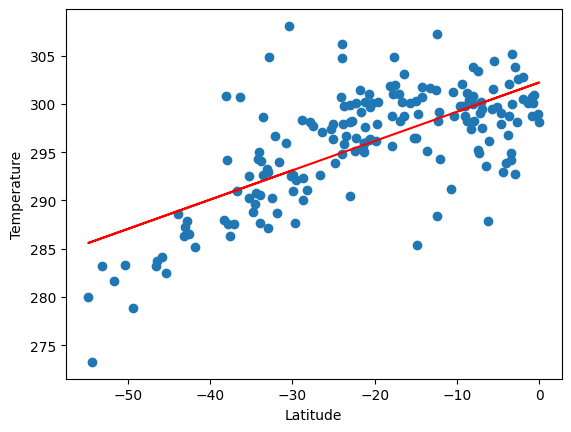

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Plot regression line
(slope, intercept, rvalue, p, se) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope, 2))+ 'x' + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r square value
print(f"R squared: {rvalue**2}")


# Show plot
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere charts closer to the line, but the line appears to be representative in both cases.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.06895409933400765


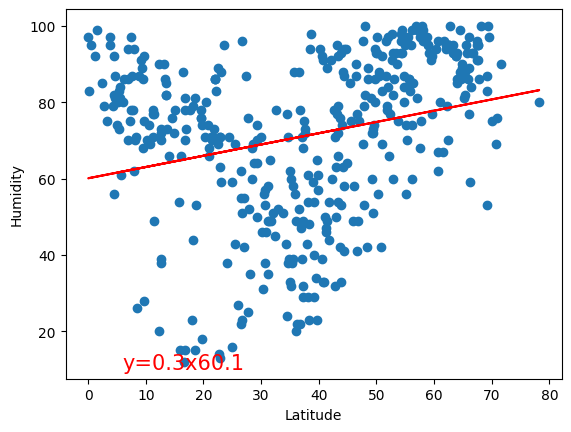

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Plot regression line
(slope, intercept, rvalue, p, se) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope, 2))+ 'x' + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r square value
print(f"R squared: {rvalue**2}")


# Show plot
plt.show()

R squared: 0.004227020692583286


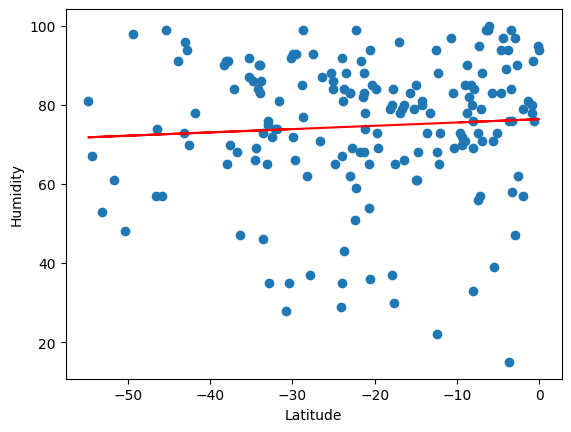

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Plot regression line
(slope, intercept, rvalue, p, se) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope, 2))+ 'x' + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r square value
print(f"R squared: {rvalue**2}")


# Show plot
plt.show()

**Discussion about the linear relationship:** There seems to be no real relationship here.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.03934880396813066


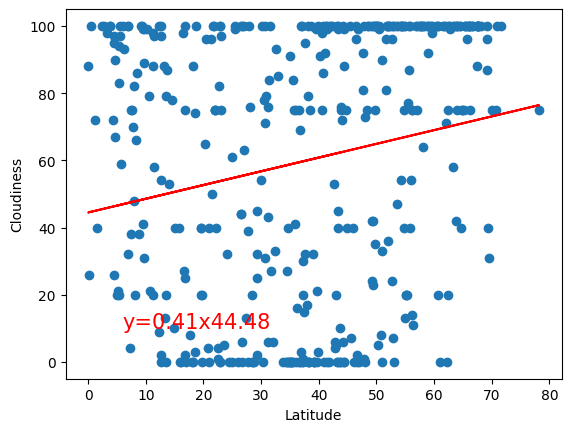

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Plot regression line
(slope, intercept, rvalue, p, se) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope, 2))+ 'x' + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r square value
print(f"R squared: {rvalue**2}")


# Show plot
plt.show()

R squared: 0.01141923854484162


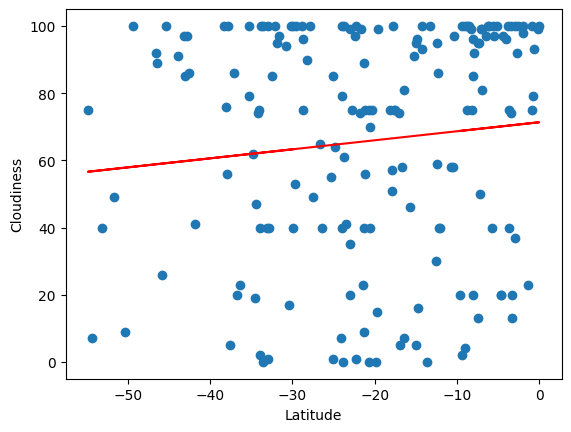

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Plot regression line
(slope, intercept, rvalue, p, se) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope, 2))+ 'x' + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r square value
print(f"R squared: {rvalue**2}")


# Show plot
plt.show()

**Discussion about the linear relationship:** No significant relationship observed.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0040843852557404196


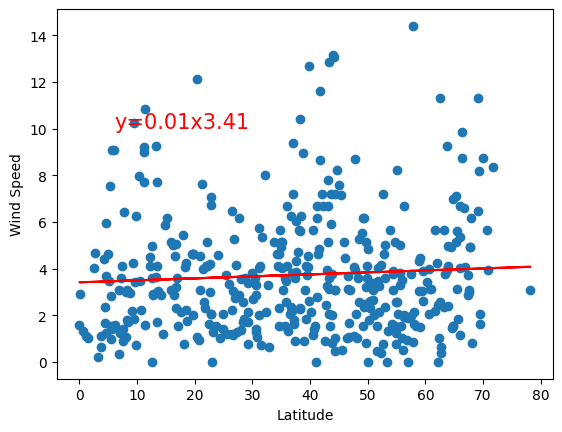

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Plot regression line
(slope, intercept, rvalue, p, se) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope, 2))+ 'x' + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r square value
print(f"R squared: {rvalue**2}")


# Show plot
plt.show()

R squared: 0.18096598415061796


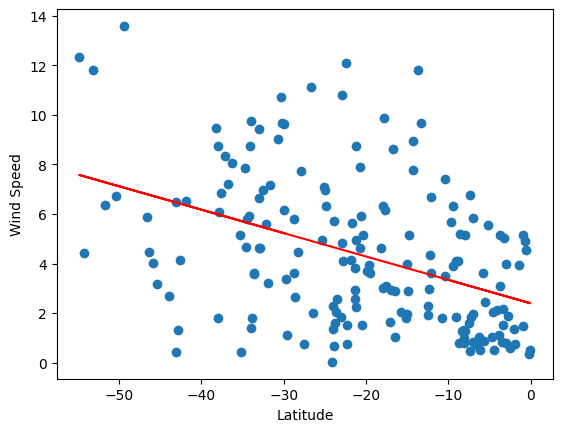

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Plot regression line
(slope, intercept, rvalue, p, se) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y=' + str(round(slope, 2))+ 'x' + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r square value
print(f"R squared: {rvalue**2}")


# Show plot
plt.show()

**Discussion about the linear relationship:** There is a slight trend in the Southern Hemisphere.